Day 12

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("patrickb1912/ipl-complete-dataset-20082020")
path=r'C:\Users\Maddox\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3'
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Maddox\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3


In [2]:
import os
all_file=os.listdir(path)
file_1,file_2=all_file
file_2

'matches.csv'

In [3]:
file_1_path=path + '/' + file_1
print(file_1_path)

file_2_path=path + '/' + file_2
print(file_2_path)

C:\Users\Maddox\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/deliveries.csv
C:\Users\Maddox\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/matches.csv


In [4]:
#import all libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("All modules called")

df_matches=pd.read_csv(file_2_path)
df_delivery=pd.read_csv(file_1_path)



All modules called


In [5]:
display(df_delivery.head(2))
display(df_matches.head(2))

print(df_matches.shape)
print(df_delivery.shape)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


(1095, 20)
(260920, 17)


In [6]:
df_matches.info()
#There are null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [7]:
display(df_matches.isnull().sum().sort_values(ascending=False))
display(df_matches['winner'])

method             1074
city                 51
result_margin        19
player_of_match       5
winner                5
target_runs           3
target_overs          3
id                    0
date                  0
season                0
venue                 0
match_type            0
toss_decision         0
toss_winner           0
team2                 0
team1                 0
result                0
super_over            0
umpire1               0
umpire2               0
dtype: int64

0             Kolkata Knight Riders
1               Chennai Super Kings
2                  Delhi Daredevils
3       Royal Challengers Bangalore
4             Kolkata Knight Riders
                   ...             
1090            Sunrisers Hyderabad
1091          Kolkata Knight Riders
1092               Rajasthan Royals
1093            Sunrisers Hyderabad
1094          Kolkata Knight Riders
Name: winner, Length: 1095, dtype: object

<Axes: >

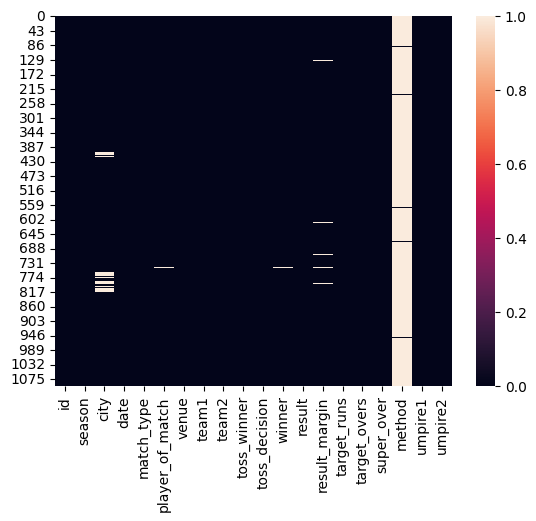

In [8]:
sns.heatmap(df_matches.isnull())

In [9]:
#null value count in percentage
df_matches.isnull().mean().sort_values(ascending=False)*100

method             98.082192
city                4.657534
result_margin       1.735160
player_of_match     0.456621
winner              0.456621
target_runs         0.273973
target_overs        0.273973
id                  0.000000
date                0.000000
season              0.000000
venue               0.000000
match_type          0.000000
toss_decision       0.000000
toss_winner         0.000000
team2               0.000000
team1               0.000000
result              0.000000
super_over          0.000000
umpire1             0.000000
umpire2             0.000000
dtype: float64

In [10]:
#now check what this 'method' column is like
display(df_matches['method'].value_counts())
#only 1 data (D/L) which was used 21 times
#we'll fill all other methods with "Normal" method

method
D/L    21
Name: count, dtype: int64

In [11]:
df_matches['method'].fillna('Normal Method',inplace=True)
display(df_matches.isnull().sum().sort_values(ascending=False))
#Now no missing values in df_matches['method']

C:\Users\Maddox\AppData\Local\Temp\ipykernel_22108\1709395566.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['method'].fillna('Normal Method',inplace=True)


city               51
result_margin      19
player_of_match     5
winner              5
target_overs        3
target_runs         3
id                  0
season              0
date                0
team1               0
venue               0
match_type          0
toss_decision       0
toss_winner         0
team2               0
result              0
super_over          0
method              0
umpire1             0
umpire2             0
dtype: int64

**Now lets treat the "city" column**

In [12]:
display(df_matches['city'].value_counts())
display(df_matches['city'].value_counts().sum())

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

np.int64(1044)

In [13]:
#Display all the rows with null values in 'city' column 
df_matches[df_matches['city'].isnull()]
#Fill the NaN values in 'city' column
df_matches['city'].fillna('UAE',inplace=True)# all the venue shows that all city with NaN were in Dubai (UAE)

C:\Users\Maddox\AppData\Local\Temp\ipykernel_22108\302991341.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['city'].fillna('UAE',inplace=True)# all the venue shows that all city with NaN were in Dubai (UAE)


**Now we'll work on "result_margin" column**

In [14]:
df_matches['result_margin'].info()
df_matches['result_margin'].value_counts()
df_matches['result_margin'].value_counts().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 1095 entries, 0 to 1094
Series name: result_margin
Non-Null Count  Dtype  
--------------  -----  
1076 non-null   float64
dtypes: float64(1)
memory usage: 8.7 KB


np.int64(1076)

In [15]:
#Display all the rows with null values in 'result_margin' column 
df_matches[df_matches['result_margin'].isnull()]
#Fill the NaN values in 'city' column
df_matches['result_margin'].fillna(0.00,inplace=True)

C:\Users\Maddox\AppData\Local\Temp\ipykernel_22108\2922937291.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['result_margin'].fillna(0.00,inplace=True)


In [16]:
#These columns with Null values left
# winner             0.456621
# player_of_match    0.456621
# target_overs       0.273973
# target_runs        0.273973

**Now we'll work on "winner" column and 'player_of_match'**

In [17]:
# #Display all the rows with null values in 'result_margin' column 
# display(df_matches[df_matches['winner'].isnull()])
# #Fill the NaN values in 'city' column
# df_matches['winner'].fillna('No Winner',inplace=True)
# #null value count in percentage
# df_matches.isnull().mean().sort_values(ascending=False)*100

In [18]:
#Display all the rows with null values in 'result_margin' column 
display(df_matches[df_matches['winner'].isnull()])
#Fill the NaN values in 'city' column
df_matches.fillna({'player_of_match':'No Player of the match',
                   'winner':'No Winner'},inplace=True)
#null value count in percentage after treating missing values
df_matches.isnull().mean().sort_values(ascending=False)*100


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,0.0,NaN,NaN,N,Normal Method,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,NaN,NaN,N,Normal Method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,0.0,188.0,20.0,N,Normal Method,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,63.0,5.0,N,Normal Method,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,0.0,NaN,NaN,N,Normal Method,AK Chaudhary,NA Patwardhan


target_overs       0.273973
target_runs        0.273973
id                 0.000000
season             0.000000
date               0.000000
city               0.000000
match_type         0.000000
player_of_match    0.000000
team2              0.000000
toss_winner        0.000000
venue              0.000000
team1              0.000000
winner             0.000000
toss_decision      0.000000
result_margin      0.000000
result             0.000000
super_over         0.000000
method             0.000000
umpire1            0.000000
umpire2            0.000000
dtype: float64

**Now we'll work on "target_overs" column and 'targer_runs'**

In [19]:
#Here all the NaN values will filled with the value 0 i.e., 'target_runs','target_overs'
df_matches.fillna(0,inplace=True)

#null value count in percentage after treating missing values
df_matches.isnull().mean().sort_values(ascending=False)*100


id                 0.0
season             0.0
city               0.0
date               0.0
match_type         0.0
player_of_match    0.0
venue              0.0
team1              0.0
team2              0.0
toss_winner        0.0
toss_decision      0.0
winner             0.0
result             0.0
result_margin      0.0
target_runs        0.0
target_overs       0.0
super_over         0.0
method             0.0
umpire1            0.0
umpire2            0.0
dtype: float64

**Done with Data Cleaning[fillna]**

<Axes: >

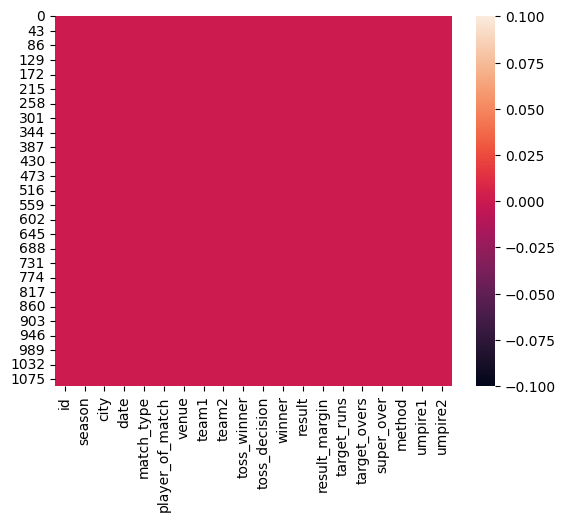

In [20]:
sns.heatmap(df_matches.isnull())

In [21]:
display(df_matches['city'].value_counts())
#We have different names for same place
# df_matches[df_matches['city'].value_counts()=='Dubai']

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
UAE                51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cuttack             7
Cape Town           7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

Let's change the name to a same name for same place with different names

In [22]:
# changing the data
dict1={'Navi Mumbai':'Mumbai','Bengaluru':'Bangalore',
       'Sharjah':'UAE', 'Abu Dhabi':'UAE',
       'Kimberley':'Cape Town','Dubai':'UAE'}
df_matches.replace(dict1,inplace=True)
print('Done')

Done


Check and drop duplicated

In [23]:
display(df_matches.duplicated().value_counts())
#No Duplicates!!! All False!!!
display(df_matches.drop_duplicates(inplace=True))

False    1095
Name: count, dtype: int64

None

Lets make data column as Data data_type instead of object data_type for ARIMA (Time series analysis)

In [24]:
df_matches['date']=pd.to_datetime(df_matches['date'])
print('Done')
display(df_matches['date'].info())

Done
<class 'pandas.core.series.Series'>
RangeIndex: 1095 entries, 0 to 1094
Series name: date
Non-Null Count  Dtype         
--------------  -----         
1095 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.7 KB


None

Done with Pre-Processing (not really)

In [25]:
display(df_matches['venue'].value_counts())
#we dont want the name of cities as shown in value columns

venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narend

In [26]:
splitted_df=df_matches['venue'].str.split(',')
#apply() itterate row wise in the data
df_matches['venue']=df_matches['venue'].apply(lambda row: row.title().split(',')[0])

In [27]:
df_matches['venue'].value_counts()

venue
Wankhede Stadium                                                118
Eden Gardens                                                     93
Ma Chidambaram Stadium                                           85
M Chinnaswamy Stadium                                            79
Rajiv Gandhi International Stadium                               77
Feroz Shah Kotla                                                 60
Sawai Mansingh Stadium                                           57
Dubai International Cricket Stadium                              46
Dr Dy Patil Sports Academy                                       37
Punjab Cricket Association Stadium                               35
Maharashtra Cricket Association Stadium                          35
Arun Jaitley Stadium                                             30
Sheikh Zayed Stadium                                             29
Sharjah Cricket Stadium                                          28
Brabourne Stadium                         

Done


C:\Users\Maddox\AppData\Local\Temp\ipykernel_22108\570845727.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['venue'].replace(dict2,inplace=True)


venue
Wankhede Stadium                                                118
M.Chinnaswamy Stadium                                            94
Eden Gardens                                                     93
Arun Jaitley Stadium                                             90
Ma Chidambaram Stadium                                           85
Rajiv Gandhi International Stadium                               77
Punjab Cricket Association Stadium                               61
Sawai Mansingh Stadium                                           57
Dubai International Cricket Stadium                              46
Dr Dy Patil Sports Academy                                       37
Narendra Modi Stadium                                            36
Maharashtra Cricket Association Stadium                          35
Sheikh Zayed Stadium                                             29
Sharjah Cricket Stadium                                          28
Brabourne Stadium                         

<function matplotlib.pyplot.show(close=None, block=None)>

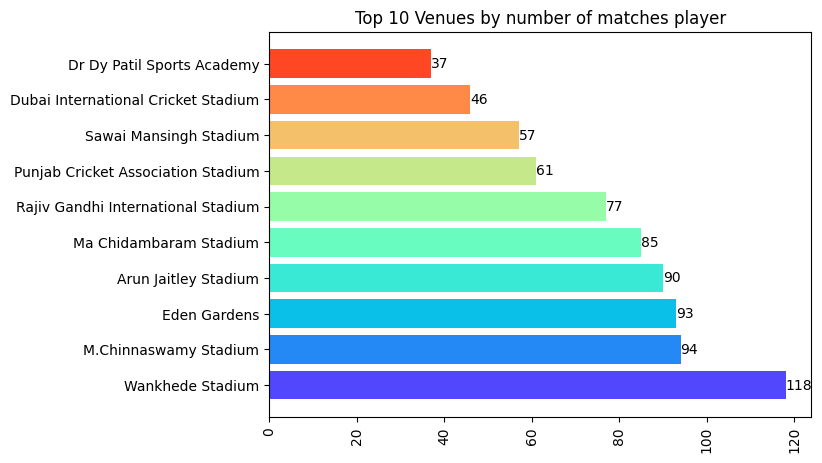

In [28]:
dict2={'M Chinnaswamy Stadium':'M.Chinnaswamy Stadium',
       'Feroz Shah Kotla':'Arun Jaitley Stadium',
       'Sardar Patel Stadium':'Narendra Modi Stadium',
       'Punjab Cricket Association Is Bindra Stadium':'Punjab Cricket Association Stadium',
       }
df_matches['venue'].replace(dict2,inplace=True)
print('Done')
display(df_matches['venue'].value_counts())


#Graph it

x=df_matches['venue'].value_counts().head(10).index
y=df_matches['venue'].value_counts().head(10).values
plt.figure(figsize=(7,5))
ax=plt.barh(x,y,color=sns.color_palette('rainbow',10))
plt.bar_label(ax)
plt.title("Top 10 Venues by number of matches player")

plt.xticks(rotation=90)

plt.show

**Now treating 'team1' and 'team2' columns**

In [29]:
df_matches[['toss_winner']].value_counts().sort_values(ascending=False)

toss_winner                
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [30]:
team_names={'Delhi Daredevils':'Delhi Capitals',
            'Rising Pune Supergiant':'Rising Pune Supergiants',
            'Royal Challengers Bangalore':'Royal Challengers Bengaluru',
            'Pune Warriors':'Rising Pune Supergiants'
            }
warnings.filterwarnings("ignore")
df_matches['team1'].replace(team_names,inplace=True)
df_matches['team2'].replace(team_names,inplace=True)
df_matches['winner'].replace(team_names,inplace=True)
df_matches['toss_winner']=df_matches['toss_winner'].replace(team_names)
# df_matches[['team1','team2']].replace(team_names,inplace=True)
print('Done')
display(df_matches[['team1','team2']].value_counts())


Done


team1                        team2                
Chennai Super Kings          Mumbai Indians           22
Royal Challengers Bengaluru  Chennai Super Kings      20
                             Kolkata Knight Riders    20
                             Mumbai Indians           20
Delhi Capitals               Mumbai Indians           19
                                                      ..
Kochi Tuskers Kerala         Deccan Chargers           1
                             Kolkata Knight Riders     1
Rajasthan Royals             Kochi Tuskers Kerala      1
Royal Challengers Bengaluru  Kochi Tuskers Kerala      1
Rising Pune Supergiants      Kochi Tuskers Kerala      1
Name: count, Length: 163, dtype: int64

In [31]:
display(df_matches)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M.Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal Method,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,Normal Method,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Arun Jaitley Stadium,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,Normal Method,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,Normal Method,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,Normal Method,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,Rajiv Gandhi International Stadium,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Normal Method,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,Narendra Modi Stadium,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,Normal Method,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,Narendra Modi Stadium,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,Normal Method,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,Ma Chidambaram Stadium,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Normal Method,Nitin Menon,VK Sharma


Treat Umpire 1 and Umpire 2 columns

In [32]:
df_matches['umpire1'].value_counts()
#LET'S JUST DROP THESE COLUMNS
df_matches.drop(['umpire1','umpire2'],axis=1,inplace=True)
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1095 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1095 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1095 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1095 non-null   float64       
 14  target_runs      1095 non-null   float64

In [33]:
df_matches.sample(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
966,1359491,2023,Chennai,2023-04-12,League,R Ashwin,Ma Chidambaram Stadium,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,field,Rajasthan Royals,runs,3.0,176.0,20.0,N,Normal Method
183,501206,2011,Chandigarh,2011-04-13,League,PC Valthaty,Punjab Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,189.0,20.0,N,Normal Method


Analysis

winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    3
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Gujarat Titans           1
Name: count, dtype: int64

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr Dy Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,164.0,20.0,N,Normal Method
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bengaluru,Deccan Chargers,Royal Challengers Bengaluru,field,Deccan Chargers,runs,6.0,144.0,20.0,N,Normal Method
174,419165,2009/10,Mumbai,2010-04-25,Final,SK Raina,Dr Dy Patil Sports Academy,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,22.0,169.0,20.0,N,Normal Method
247,501271,2011,Chennai,2011-05-28,Final,M Vijay,Ma Chidambaram Stadium,Chennai Super Kings,Royal Challengers Bengaluru,Chennai Super Kings,bat,Chennai Super Kings,runs,58.0,206.0,20.0,N,Normal Method
321,548381,2012,Chennai,2012-05-27,Final,MS Bisla,Ma Chidambaram Stadium,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,5.0,191.0,20.0,N,Normal Method
397,598073,2013,Kolkata,2013-05-26,Final,KA Pollard,Eden Gardens,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,23.0,149.0,20.0,N,Normal Method
457,734049,2014,Bangalore,2014-06-01,Final,MK Pandey,M.Chinnaswamy Stadium,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,3.0,200.0,20.0,N,Normal Method
516,829823,2015,Kolkata,2015-05-24,Final,RG Sharma,Eden Gardens,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,runs,41.0,203.0,20.0,N,Normal Method
576,981019,2016,Bangalore,2016-05-29,Final,BCJ Cutting,M.Chinnaswamy Stadium,Royal Challengers Bengaluru,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,209.0,20.0,N,Normal Method
635,1082650,2017,Hyderabad,2017-05-21,Final,KH Pandya,Rajiv Gandhi International Stadium,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians,runs,1.0,130.0,20.0,N,Normal Method


<Axes: ylabel='count'>

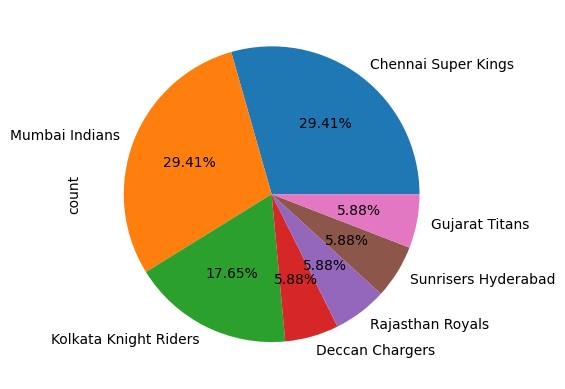

In [34]:
#List of highest seasonal winners (Teams)
final_matches_df=df_matches[df_matches['match_type']=='Final']
display(final_matches_df['winner'].value_counts())
display(final_matches_df)
final_matches_df['winner'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [35]:
#Filter the winners on the basis of year they won (date)

df_matches['date'].dt.year #date is a data data type so we can just call the year separately from that column
# df_matches['date'].dt.month
a=int(input("Enter an Year: "))
print(final_matches_df[final_matches_df['date'].dt.year==a]['winner'])

949    Gujarat Titans
Name: winner, dtype: object


In [36]:
#Filter the winners on the basis of year they won (date)
final_match = df_matches[df_matches['match_type'] == 'Final']
final_match['Winning year'] = final_match['date'].dt.year
final_match[['season','winner','date']]

,season,winner,date
57,2007/08,Rajasthan Royals,2008-06-01
114,2009,Deccan Chargers,2009-05-24
174,2009/10,Chennai Super Kings,2010-04-25
247,2011,Chennai Super Kings,2011-05-28
321,2012,Kolkata Knight Riders,2012-05-27
397,2013,Mumbai Indians,2013-05-26
457,2014,Kolkata Knight Riders,2014-06-01
516,2015,Mumbai Indians,2015-05-24
576,2016,Sunrisers Hyderabad,2016-05-29
635,2017,Mumbai Indians,2017-05-21


In [37]:
df_matches['result'].value_counts()

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

In [38]:
display(final_match.sample(2))
display(final_match['venue'].value_counts().sort_values(ascending=False))

final_match.groupby('venue')['result'].value_counts().reset_index().sort_values(by='count',ascending=False)


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,Winning year
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bengaluru,Deccan Chargers,Royal Challengers Bengaluru,field,Deccan Chargers,runs,6.0,144.0,20.0,N,Normal Method,2009
516,829823,2015,Kolkata,2015-05-24,Final,RG Sharma,Eden Gardens,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,runs,41.0,203.0,20.0,N,Normal Method,2015


venue
Ma Chidambaram Stadium                 3
Dr Dy Patil Sports Academy             2
Eden Gardens                           2
M.Chinnaswamy Stadium                  2
Rajiv Gandhi International Stadium     2
Narendra Modi Stadium                  2
Dubai International Cricket Stadium    2
New Wanderers Stadium                  1
Wankhede Stadium                       1
Name: count, dtype: int64

,venue,result,count
4,Eden Gardens,runs,2
9,Narendra Modi Stadium,wickets,2
11,Rajiv Gandhi International Stadium,runs,2
7,Ma Chidambaram Stadium,wickets,2
0,Dr Dy Patil Sports Academy,runs,1
3,Dubai International Cricket Stadium,wickets,1
2,Dubai International Cricket Stadium,runs,1
1,Dr Dy Patil Sports Academy,wickets,1
5,M.Chinnaswamy Stadium,runs,1
8,Ma Chidambaram Stadium,runs,1


In [39]:
display(df_matches.sample(2))
display(df_matches['venue'].value_counts().sort_values(ascending=False))
df_matches.groupby('venue')['result'].value_counts().reset_index().sort_values(by='count',ascending=False)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
601,1082615,2017,Pune,2017-04-22,League,MS Dhoni,Maharashtra Cricket Association Stadium,Rising Pune Supergiants,Sunrisers Hyderabad,Rising Pune Supergiants,field,Rising Pune Supergiants,wickets,6.0,177.0,20.0,N,Normal Method
583,1082597,2017,Mumbai,2017-04-09,League,N Rana,Wankhede Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,4.0,179.0,20.0,N,Normal Method


venue
Wankhede Stadium                                                118
M.Chinnaswamy Stadium                                            94
Eden Gardens                                                     93
Arun Jaitley Stadium                                             90
Ma Chidambaram Stadium                                           85
Rajiv Gandhi International Stadium                               77
Punjab Cricket Association Stadium                               61
Sawai Mansingh Stadium                                           57
Dubai International Cricket Stadium                              46
Dr Dy Patil Sports Academy                                       37
Narendra Modi Stadium                                            36
Maharashtra Cricket Association Stadium                          35
Sheikh Zayed Stadium                                             29
Sharjah Cricket Stadium                                          28
Brabourne Stadium                         

,venue,result,count
83,Wankhede Stadium,wickets,64
24,Eden Gardens,wickets,53
84,Wankhede Stadium,runs,53
35,M.Chinnaswamy Stadium,wickets,49
39,Ma Chidambaram Stadium,runs,47
...,...,...,...
62,Rajiv Gandhi International Stadium,tie,1
65,Saurashtra Cricket Association Stadium,tie,1
57,Outsurance Oval,wickets,1
82,Vidarbha Cricket Association Stadium,wickets,1


Day 13

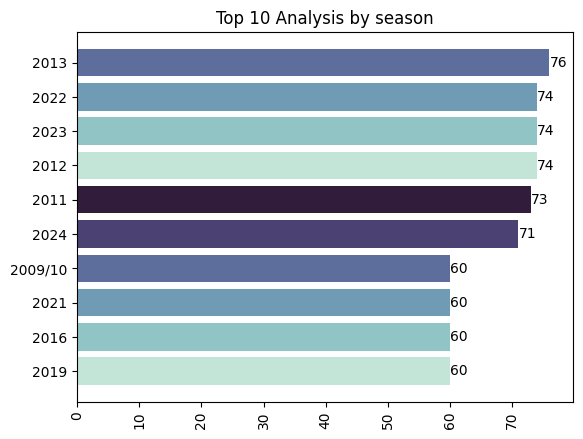

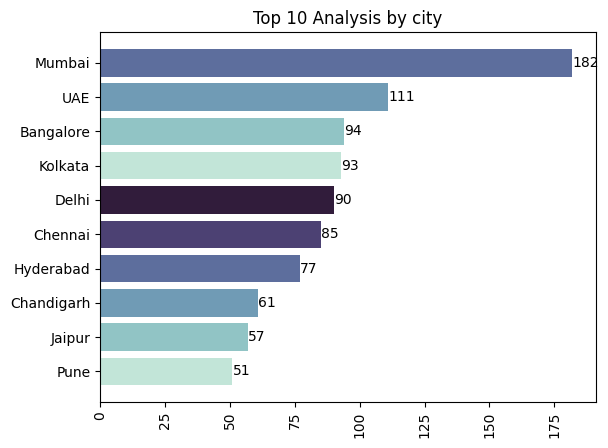

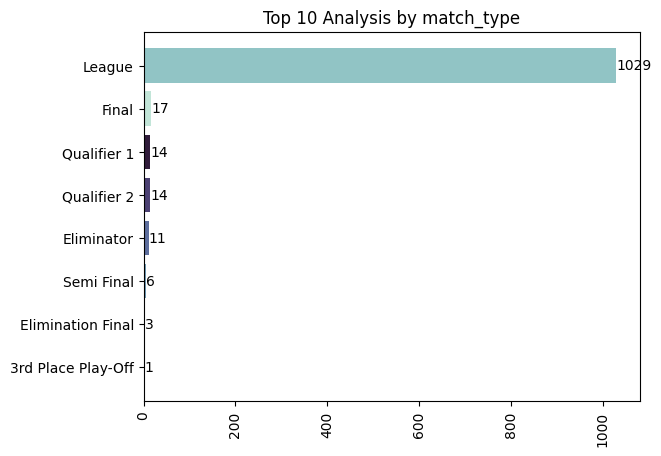

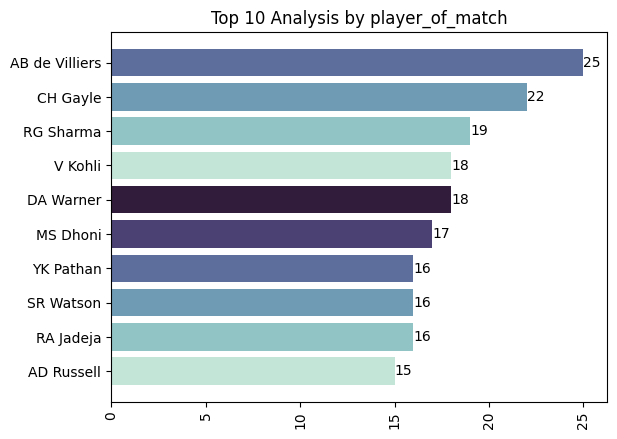

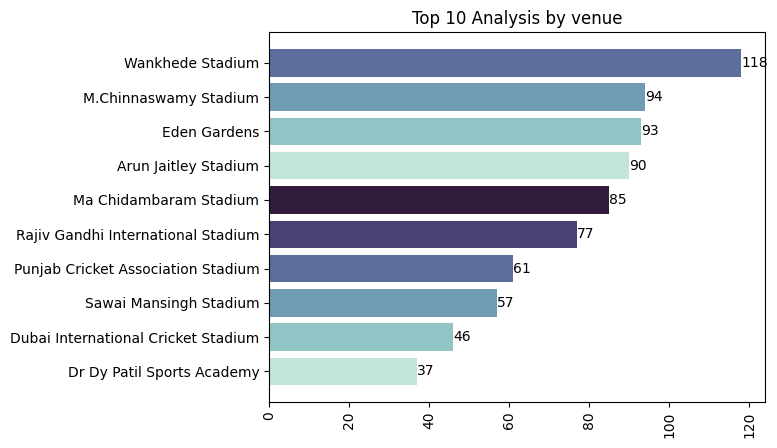

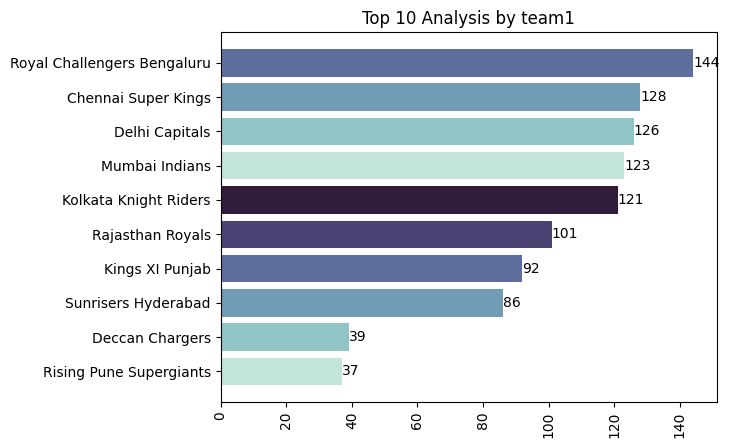

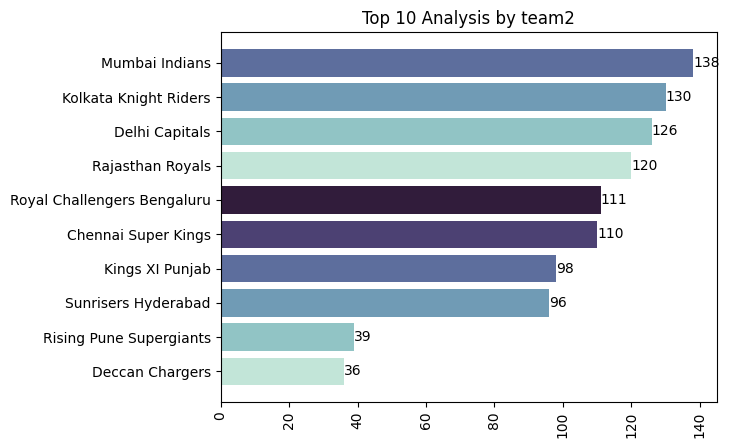

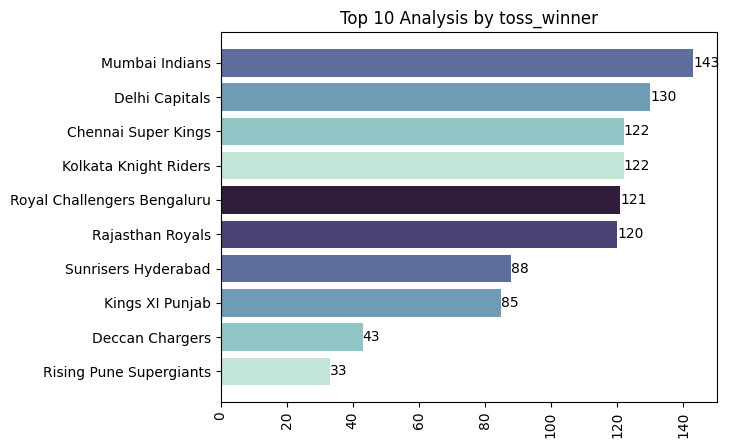

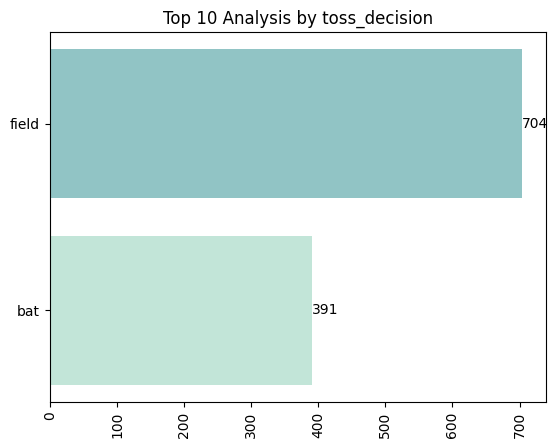

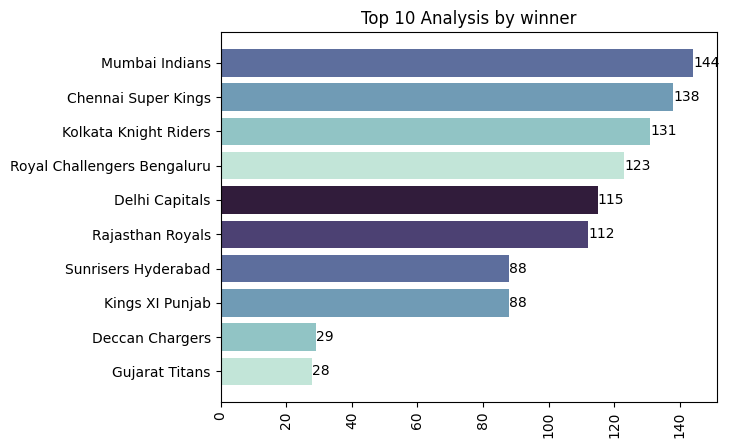

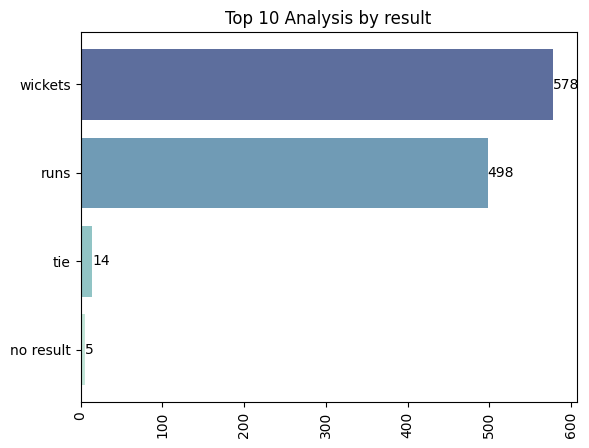

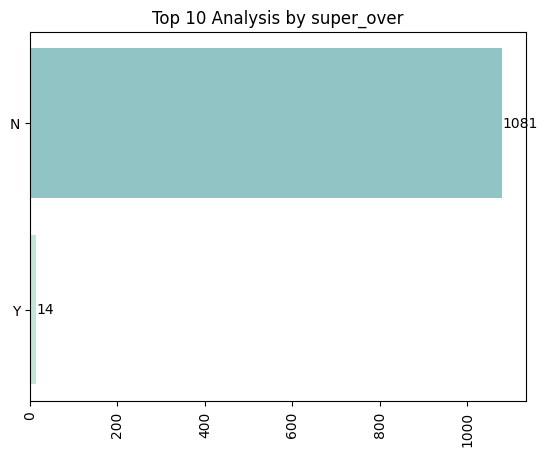

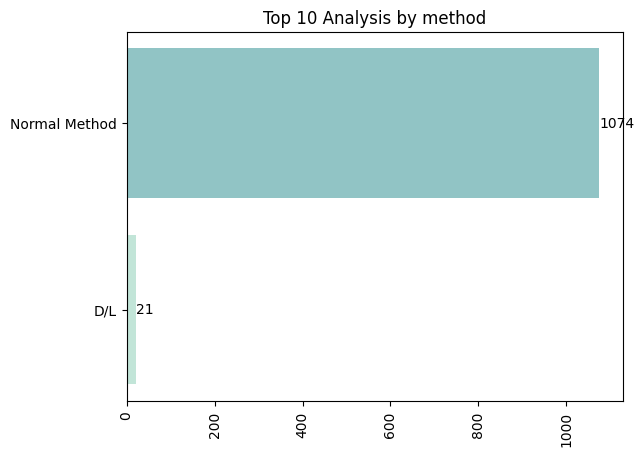

In [78]:
# All Univariate analysis
#Check if the column is number or other (Categorical)
num_cols = df_matches.describe().columns
cat_cols = df_matches.describe(include = 'O').columns

for i in cat_cols:
    temp_df=df_matches[i].value_counts().head(10).sort_values(ascending=True)
    x=temp_df.index
    y=temp_df.values
    # display(x)

    plt.title(f"Top 10 Analysis by {i}")
    ax=plt.barh(x,y,color=sns.cubehelix_palette(start=.5, rot=-.5))
    #To label the bars, we need to send the whole plt.bar() to another function plt.bar_label
    plt.bar_label(ax)
    plt.xticks(rotation=90)
    plt.show()


In [40]:
# Questions to be solve?
# Each season Winner Team
# Top 10 Match Winner team
# Toss_dicision_value_counts
# Result type value_counts
# Top 10 target Runs
# Maximum Result Margin Wins
# Top 5 Result Margin Wins
# Top 10 player_of_match
# Season Player of the match

In [42]:
# Each season Winner Team
season_winning_team=final_match[['Winning year','winner']].sort_values('Winning year')
season_winning_team

,Winning year,winner
57,2008,Rajasthan Royals
114,2009,Deccan Chargers
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad
635,2017,Mumbai Indians


In [46]:
# Top 10 Match Winner team
df_matches['winner'].value_counts().head(10)

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bengaluru    123
Delhi Capitals                 115
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Deccan Chargers                 29
Gujarat Titans                  28
Name: count, dtype: int64

In [47]:
# Toss_dicision_value_counts
df_matches['toss_decision'].value_counts()

toss_decision
field    704
bat      391
Name: count, dtype: int64

In [48]:
# Result type value_counts
df_matches['result'].value_counts()

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

In [55]:
# Top 10 target Runs
df_matches[['winner','target_runs']].sort_values('target_runs',ascending=False).head(10)

,winner,target_runs
1053,Sunrisers Hyderabad,288.0
1031,Sunrisers Hyderabad,278.0
1039,Kolkata Knight Riders,273.0
1058,Sunrisers Hyderabad,267.0
352,Royal Challengers Bengaluru,264.0
1065,Punjab Kings,262.0
1066,Delhi Capitals,258.0
987,Lucknow Super Giants,258.0
560,Royal Challengers Bengaluru,249.0
146,Chennai Super Kings,247.0


In [ ]:
# Maximum Result Margin Wins
df_matches['result_margin'].